In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import re
import string

In [2]:
pd.set_option('max_colwidth', 150)
df = pd.read_csv('C:\\Users\\Arunkumar DS\\Downloads\\vaccine tweets 2.csv',engine='python')
df.drop_duplicates(subset='text',inplace=True)

In [3]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1.337816e+18,WION,India,#WION: World Is One | Welcome to Indiaâ€™s first global news network. We present global stories with an Indian perspective. | https://t.co/V3tpBavoXE,3/21/2016 3:44,292510,91,7531,1,12/12/2020 17:45,The agency also released new information for health care providers and for patients as the US shipped millions of dâ€¦ https://t.co/sG6BtD7jD9,NaN,TweetDeck,0,18,0
1,1.338575e+18,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #IoT #Fintech #BigData #AR #VR #ML #finserv #iiot #cryptocurrencies #finance #spotifypodcast - The Al...,6/11/2012 13:50,3372,1713,119631,0,12/14/2020 20:00,#UgurSahin #ozlemtureci the #Muslim Scientists Husband-Wife are saving the world with their #PfizerBioNTechâ€¦ https://t.co/g5zKRNrxMu,"['UgurSahin', 'ozlemtureci', 'Muslim', 'PfizerBioNTech']",Twitter for Android,0,0,0
2,1.338551e+18,India Blooms,India,A news and reference portal on India and a 24X7 news service,10/10/2009 11:19,16816,2448,20,0,12/14/2020 18:27,Toronto to receive Ontario's 1st doses of Pfizer COVID-19 vaccine today\nhttps://t.co/Tt7qxCQqDY\n#Ontarioâ€¦ https://t.co/vacMDknWAV,['Ontario'],Twitter Web App,0,0,0
3,1.338466e+18,Rachna Tandon,India,"District Epidemiologist, Meerut (IDSP). MDI-Gurgaon Alumni. Tweets are personal opinion. RTs are not an endorsement.",10/2/2014 20:07,72,120,66,0,12/14/2020 12:48,"More approvals to #PfizerBioNTech vaccine: #Singapore approves @pfizer #CovidVaccine, expects first shots by Decembâ€¦ https://t.co/fXYyeHXQTf","['PfizerBioNTech', 'Singapore', 'CovidVaccine']",Twitter Web App,0,0,0
4,1.338377e+18,India.com,India,"Follow https://t.co/RBTHZHv1ga for breaking news from India and around the world, live cricket updates, Bollywood gossip, travel tips and latest t...",3/4/2009 16:20,13417,399,349,1,12/14/2020 6:57,#Pfizervaccine is unlikely to be available in India for mass distribution. Read to find out why.\n\n#PfizerBioNTechâ€¦ https://t.co/2ywdDnR70w,"['Pfizervaccine', 'PfizerBioNTech']",TweetDeck,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,1.445392e+18,Mint,India,"Breaking news and analyses of Indian and world business, economy and politics from Mint.",11/27/2008 9:07,1990851,69,511,1,10/5/2021 14:15,"#WHO still reviewing #SputnikV vaccine, as Russia presses bid \n\nhttps://t.co/doicVXwXOe https://t.co/LwVLQ9VVr0","['WHO', 'SputnikV']",Twitter Web App,1,14,0
7401,1.444307e+18,Rohit kumar gangotia,India,"I m lover of beauty,wisdom and darkness which is always around me. \n#gangotia I am a #Multipotentialite and working over many projects at same time.",11/8/2009 11:01,1336,2352,684,0,10/2/2021 14:23,Fully vaccinated couple with #SputnikV . thanks @sputnikvaccine thanks @shalbyhospitals Mohali for first jab andâ€¦ https://t.co/2GppZQWZAc,['SputnikV'],Twitter for Android,0,1,0
7402,1.444300e+18,Saral Bharat News,India,"à¤¸à¤°à¤² à¤­à¤¾à¤°à¤¤ à¤¨à¥à¤¯à¥‚à¤œà¤¼ à¤šà¥ˆà¤¨à¤² à¤°à¤¾à¤œà¤¨à¥€à¤¤à¤¿, à¤µà¥à¤¯à¤ªà¤¾à¤°, à¤‰à¤ªà¤²à¤¬à¥à¤§à¤¿, à¤–à¥‡à¤² à¤œà¤—à¤¤ à¤®à...",6/12/2020 5:20,103,199,310,0,10/2/2021 13:53,#WHO has lifted barriers for #SputnikV approval: Russian Health Minister\n#saralbharatnews https://t.co/28SWuMtlGt,"['WHO', 'SputnikV', 'saralbharatnews']",Twitter for Android,1,0,0
7403,1.444291e+18,India Ahead News,India,Digital and Mobile platform for discovering and sharing news on the go.,3/29/2018 8:24,25099,159,752,1,10/2/2021 13:20,WHO Has Lifted Barriers For Sputnik V Approval: Russian Health Minister\n#SputnikV #vaccine \nhttps://t.co/rDHyFVb081,"['SputnikV', 'vaccine']",Twitter Web App,0,5,0


In [4]:
#shape of the data
df.shape


(7396, 16)

In [5]:
#Missing values present
df.isnull().sum()

id                     0
user_name              0
user_location          0
user_description     347
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1519
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [6]:
df.nunique()

id                  7396
user_name           2308
user_location          9
user_description    2291
user_created        2250
user_followers      3075
user_friends        1435
user_favourites     2832
user_verified          2
date                6946
text                7396
hashtags            2730
source                43
retweets             109
favorites            258
is_retweet             1
dtype: int64

In [7]:
df['user_location'].unique()[:60]

array(['India', 'INDIA', 'India ', 'india', ' INDIA', ' India', 'india ',
       'INDIA ', ' India '], dtype=object)

In [8]:
df ['cnt mentions']=df ['text'].apply(lambda x : len([t for t in x.split() if t.startswith('@')]))
df ['cnt mentions'].describe()


count    7396.000000
mean        0.552190
std         1.236194
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        11.000000
Name: cnt mentions, dtype: float64

In [9]:
df [df ['cnt mentions']==11]

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,cnt mentions
3266,1.396995e+18,Vinayak Naik,India,"Security Professional. True Citizen, True Soldier, Not from any Political Party, Jai Hind.",2/12/2010 15:18,28,360,2172,0,5/25/2021 1:02,@drharshvardhan @UNITAR @PMOIndia @narendramodi @UN @WHO @DefeatNCD @AyushmanNHA @MoHFW_INDIA @NITIAayog @moayush Sâ€¦ https://t.co/sYriBuElWZ,NaN,Twitter for Android,0,0,0,11
6706,1.432345e+18,PRITI VERMA ARORA,INDIA,NaN,1/11/2010 11:31,49,213,1231,0,8/30/2021 14:08,@TexasNative16 @Alexaandollie @WHO @WHO_Europe @pahowho @WHOSEARO @WHOWPRO @WHOEMRO @WHOAFRO @opsoms @BharatBiotechâ€¦ https://t.co/nBAtj0Z3KR,NaN,Twitter for Android,0,0,0,11
6707,1.432344e+18,PRITI VERMA ARORA,INDIA,NaN,1/11/2010 11:31,49,213,1231,0,8/30/2021 14:06,@TexasNative16 @Alexaandollie @WHO @WHO_Europe @pahowho @WHOSEARO @WHOWPRO @WHOEMRO @WHOAFRO @opsoms @BharatBiotechâ€¦ https://t.co/ADSZ2MxTuJ,NaN,Twitter for Android,0,1,0,11


In [10]:
df.drop(df[df['cnt mentions'] >10].index , inplace=True)
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,cnt mentions
0,1.337816e+18,WION,India,#WION: World Is One | Welcome to Indiaâ€™s first global news network. We present global stories with an Indian perspective. | https://t.co/V3tpBavoXE,3/21/2016 3:44,292510,91,7531,1,12/12/2020 17:45,The agency also released new information for health care providers and for patients as the US shipped millions of dâ€¦ https://t.co/sG6BtD7jD9,NaN,TweetDeck,0,18,0,0
1,1.338575e+18,Prof. Manish Thakur,India,#Proprietor English Academy #Blockchain #AI #IoT #Fintech #BigData #AR #VR #ML #finserv #iiot #cryptocurrencies #finance #spotifypodcast - The Al...,6/11/2012 13:50,3372,1713,119631,0,12/14/2020 20:00,#UgurSahin #ozlemtureci the #Muslim Scientists Husband-Wife are saving the world with their #PfizerBioNTechâ€¦ https://t.co/g5zKRNrxMu,"['UgurSahin', 'ozlemtureci', 'Muslim', 'PfizerBioNTech']",Twitter for Android,0,0,0,0
2,1.338551e+18,India Blooms,India,A news and reference portal on India and a 24X7 news service,10/10/2009 11:19,16816,2448,20,0,12/14/2020 18:27,Toronto to receive Ontario's 1st doses of Pfizer COVID-19 vaccine today\nhttps://t.co/Tt7qxCQqDY\n#Ontarioâ€¦ https://t.co/vacMDknWAV,['Ontario'],Twitter Web App,0,0,0,0
3,1.338466e+18,Rachna Tandon,India,"District Epidemiologist, Meerut (IDSP). MDI-Gurgaon Alumni. Tweets are personal opinion. RTs are not an endorsement.",10/2/2014 20:07,72,120,66,0,12/14/2020 12:48,"More approvals to #PfizerBioNTech vaccine: #Singapore approves @pfizer #CovidVaccine, expects first shots by Decembâ€¦ https://t.co/fXYyeHXQTf","['PfizerBioNTech', 'Singapore', 'CovidVaccine']",Twitter Web App,0,0,0,1
4,1.338377e+18,India.com,India,"Follow https://t.co/RBTHZHv1ga for breaking news from India and around the world, live cricket updates, Bollywood gossip, travel tips and latest t...",3/4/2009 16:20,13417,399,349,1,12/14/2020 6:57,#Pfizervaccine is unlikely to be available in India for mass distribution. Read to find out why.\n\n#PfizerBioNTechâ€¦ https://t.co/2ywdDnR70w,"['Pfizervaccine', 'PfizerBioNTech']",TweetDeck,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7400,1.445392e+18,Mint,India,"Breaking news and analyses of Indian and world business, economy and politics from Mint.",11/27/2008 9:07,1990851,69,511,1,10/5/2021 14:15,"#WHO still reviewing #SputnikV vaccine, as Russia presses bid \n\nhttps://t.co/doicVXwXOe https://t.co/LwVLQ9VVr0","['WHO', 'SputnikV']",Twitter Web App,1,14,0,0
7401,1.444307e+18,Rohit kumar gangotia,India,"I m lover of beauty,wisdom and darkness which is always around me. \n#gangotia I am a #Multipotentialite and working over many projects at same time.",11/8/2009 11:01,1336,2352,684,0,10/2/2021 14:23,Fully vaccinated couple with #SputnikV . thanks @sputnikvaccine thanks @shalbyhospitals Mohali for first jab andâ€¦ https://t.co/2GppZQWZAc,['SputnikV'],Twitter for Android,0,1,0,2
7402,1.444300e+18,Saral Bharat News,India,"à¤¸à¤°à¤² à¤­à¤¾à¤°à¤¤ à¤¨à¥à¤¯à¥‚à¤œà¤¼ à¤šà¥ˆà¤¨à¤² à¤°à¤¾à¤œà¤¨à¥€à¤¤à¤¿, à¤µà¥à¤¯à¤ªà¤¾à¤°, à¤‰à¤ªà¤²à¤¬à¥à¤§à¤¿, à¤–à¥‡à¤² à¤œà¤—à¤¤ à¤®à...",6/12/2020 5:20,103,199,310,0,10/2/2021 13:53,#WHO has lifted barriers for #SputnikV approval: Russian Health Minister\n#saralbharatnews https://t.co/28SWuMtlGt,"['WHO', 'SputnikV', 'saralbharatnews']",Twitter for Android,1,0,0,0
7403,1.444291e+18,India Ahead News,India,Digital and Mobile platform for discovering and sharing news on the go.,3/29/2018 8:24,25099,159,752,1,10/2/2021 13:20,WHO Has Lifted Barriers For Sputnik V Approval: Russian Health Minister\n#SputnikV #vaccine \nhttps://t.co/rDHyFVb081,"['SputnikV', 'vaccine']",Twitter Web App,0,5,0,0


In [11]:
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

# remove urls 

df['cleaned'] = df['text'].replace(r'http\S+', ' ', regex=True)

# convert to lowercase
df['cleaned']=df['cleaned'].str.lower()

df['cleaned']=df['cleaned'].apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

## removing account names -- basically after @ words -- those are usernames

df['cleaned']=df['cleaned'].apply(lambda x :[t for t in x.split() if not t.startswith('@')] ).apply(lambda x: ' '.join(x))

# removing special characters 
df['cleaned'] = df['cleaned'].replace(r'[^A-Za-z]+', ' ', regex=True)

#removing extra spaces 
df['cleaned']=df['cleaned'].apply(lambda x : x.strip())

## removing stopwords
stop = stopwords.words('english')
stop.extend(['amp','aaa'])

df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

print('Shape of dataset',df.shape)

# removing completely blank records 
df=df[df['cleaned']!='']

print('After removing empty records, shape of the dataset',df.shape)

Shape of dataset (7393, 18)
After removing empty records, shape of the dataset (7383, 18)


In [12]:
!pip install wordcloud


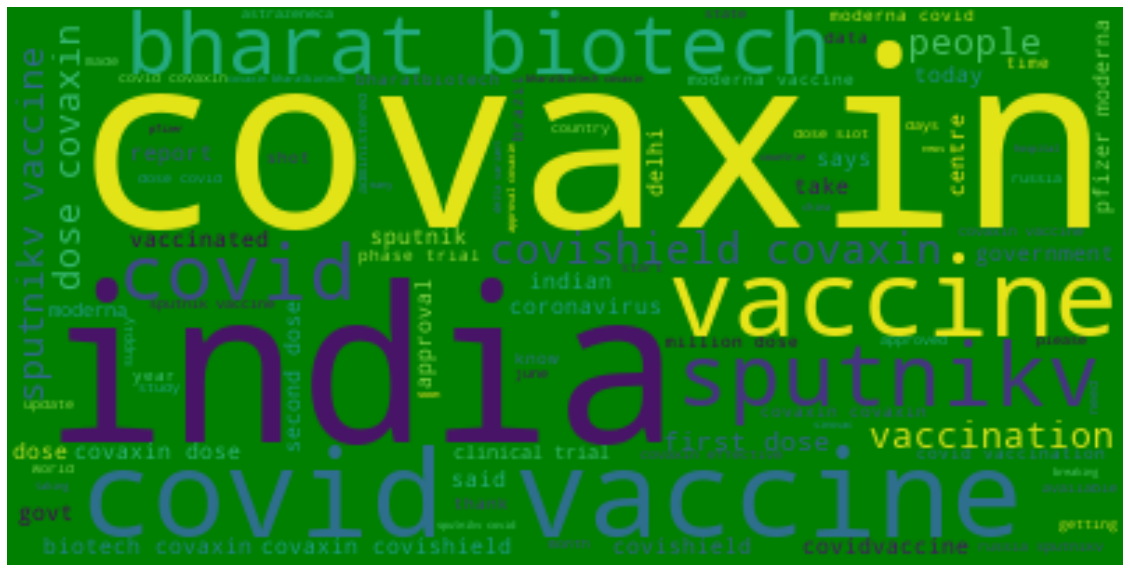

In [13]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud,STOPWORDS

text=" ".join (review for review in df['cleaned']) 
stopwords = set (STOPWORDS)

stopwords.update(['will', 'say', 'still', 'amp'])
wordcloud = WordCloud (stopwords=stopwords, background_color="green", min_word_length=4, collocation_threshold = 20).generate (text)

plt.figure(figsize= (20, 20))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

In [14]:
## Creating document term matrix using TfidfVectorizer

tfidf = TfidfVectorizer(max_df=0.95, min_df=3, stop_words='english',ngram_range=(1,2))
dtm = tfidf.fit_transform(df['cleaned'])

 
dtm       

<7383x6088 sparse matrix of type '<class 'numpy.float64'>'
	with 84432 stored elements in Compressed Sparse Row format>

In [15]:
# creating NMF model with 10 components

nmf_model = NMF(n_components=10,random_state=1)

# fitting and transforming dtm obtained,
# to get weights corresponding to belongingness of the document to each topic

topics=nmf_model.fit_transform(dtm)

In [16]:
# coefficient weights for the document0, 
#higher coefficient weights implies higher chances of belonging into particular topic.

topics[0]  

array([0.00291087, 0.00222394, 0.00172046, 0.00109791, 0.00011811,
       0.00022732, 0.00192087, 0.00292774, 0.00027319, 0.00382199])

In [17]:
len(tfidf.get_feature_names())

6088

In [18]:
pd.DataFrame(nmf_model.components_,columns=tfidf.get_feature_names())

,aa,aap,aap mla,aatmanirbharbharat,aayog,aayog dr,aayog member,ab,abad,abad india,...,young people,youth,yr,yr old,yrs,zero,zimbabwe,zycov,zydus,zydus cadila
0,0.000000,0.005088,0.000990,0.000000,0.000000,0.006143,0.000000,0.012882,0.00000,0.00000,...,0.000000,0.000601,0.000409,0.000564,0.003921,0.000000,0.002889,0.004724,0.015447,0.012214
1,0.001098,0.003621,0.001983,0.006255,0.002367,0.000000,0.002235,0.007317,0.00000,0.00000,...,0.001144,0.001928,0.000000,0.000000,0.003517,0.005467,0.000636,0.005817,0.003145,0.000000
2,0.000000,0.000000,0.000000,0.000360,0.010125,0.005057,0.005937,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000420,0.000000,0.000000,0.000222,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.010351,0.000000,0.000000,0.000000,0.000000,0.03274,0.03274,...,0.000000,0.000000,0.002105,0.000000,0.000000,0.000000,0.006484,0.006639,0.000000,0.000000
4,0.001392,0.000642,0.000463,0.005143,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.001417,0.000365,0.000272,0.003013,0.007126,0.000000,0.002618,0.000276,0.000092
5,0.013590,0.000000,0.000000,0.000265,0.027400,0.005519,0.002176,0.000056,0.00000,0.00000,...,0.000000,0.000138,0.000000,0.000304,0.000000,0.000000,0.000000,0.000202,0.002735,0.000814
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.000298,0.005931,0.006364,0.000000,0.000524,0.005873,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.004282,0.011232,0.006581,0.000274,0.000000,0.00000,0.00000,...,0.022447,0.000000,0.000000,0.000000,0.039968,0.000000,0.000000,0.000000,0.000064,0.000000
8,0.000000,0.000000,0.000000,0.007761,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000626,0.000000,0.000166,0.000005,0.006392,0.000408,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.015650,0.015851,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.000000,0.003163,0.000048,0.000000,0.006765,0.000000,0.000000,0.000000,0.001405,0.002520


In [19]:
#getting top 50 words
for index,topic in enumerate(nmf_model.components_):   
    print(f'THE TOP 50 WORDS FOR TOPIC #{index+1}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-50:]])
    print('\n')

THE TOP 50 WORDS FOR TOPIC #1
['modi', 'delta', 'covid vaccines', 'cases', 'coronavirus covid', 'new', 'people', 'variant', 'prime minister', 'astrazeneca', 'dcgi', 'covid coronavirus', 'sputnik covid', 'vaccine sputnikv', 'know', 'gets', 'effective', 'china', 'covid covidvaccine', 'health', 'moderna', 'shot', 'vaccine india', 'prime', 'covidvaccine', 'pm', 'took', 'sputnik', 'takes', 'covid covaxin', 'aiims', 'minister', 'pfizerbiontech', 'children', 'sputnikv covid', 'delhi', 'covid india', 'india covid', 'moderna covid', 'coronavirus', 'vaccine covid', 'dose covid', 'covaxin covid', 'covid covid', 'covid vaccination', 'vaccination', 'vaccine covaxin', 'covid vaccine', 'vaccine', 'covid']


THE TOP 50 WORDS FOR TOPIC #2
['march', 'procuring', 'presently governmentofindia', 'inr dose', 'procuring inr', 'governmentofindia', 'governmentofindia procuring', 'covaxin march', 'icmr study', 'india covaxin', 'like', 'read', 'says', 'indian', 'covaxin sputnikv', 'mixing covaxin', 'study mixing

In [20]:
df['Topic']=topics.argmax(axis=1)


C:\Users\Arunkumar DS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df['Topic']

0       9
1       7
2       9
3       0
4       3
       ..
7400    5
7401    8
7402    5
7403    5
7404    5
Name: Topic, Length: 7383, dtype: int64

In [22]:
first_topic = nmf_model.components_[0]
second_topic = nmf_model.components_[1]
third_topic = nmf_model.components_[2]
fourth_topic = nmf_model.components_[3]
fifth_topic=  nmf_model.components_[4]
sixth_topic=  nmf_model.components_[5]
seventh_topic=  nmf_model.components_[6]
eighth_topic=  nmf_model.components_[7]
ninth_topic=  nmf_model.components_[8]
tenth_topic=  nmf_model.components_[9]

In [23]:

first_topic = nmf_model.components_[0]
first_topic 

array([0.        , 0.00508791, 0.00098959, ..., 0.00472423, 0.01544672,
       0.01221352])

In [24]:
first_topic_words = [tfidf.get_feature_names()[i] for i in first_topic.argsort()[-50:]]
second_topic_words =[tfidf.get_feature_names()[i] for i in second_topic.argsort()[-50:]]
third_topic_words = [tfidf.get_feature_names()[i] for i in third_topic.argsort()[-50:]]
fourth_topic_words = [tfidf.get_feature_names()[i] for i in fourth_topic.argsort()[-50:]]
fifth_topic_words= [tfidf.get_feature_names()[i] for i in fifth_topic.argsort()[-50:]]
sixth_topic_words= [tfidf.get_feature_names()[i] for i in sixth_topic.argsort()[-50:]]
seventh_topic_words= [tfidf.get_feature_names()[i] for i in seventh_topic.argsort()[-50:]]
eight_topic_words= [tfidf.get_feature_names()[i] for i in eighth_topic.argsort()[-50:]]
ninth_topic_words= [tfidf.get_feature_names()[i] for i in ninth_topic.argsort()[-50:]]
tenth_topic_words= [tfidf.get_feature_names()[i] for i in tenth_topic.argsort()[-50:]]


In [25]:
first_topic_words = [tfidf.get_feature_names()[i] for i in first_topic.argsort()[-50:]]
first_topic_words


['modi',
 'delta',
 'covid vaccines',
 'cases',
 'coronavirus covid',
 'new',
 'people',
 'variant',
 'prime minister',
 'astrazeneca',
 'dcgi',
 'covid coronavirus',
 'sputnik covid',
 'vaccine sputnikv',
 'know',
 'gets',
 'effective',
 'china',
 'covid covidvaccine',
 'health',
 'moderna',
 'shot',
 'vaccine india',
 'prime',
 'covidvaccine',
 'pm',
 'took',
 'sputnik',
 'takes',
 'covid covaxin',
 'aiims',
 'minister',
 'pfizerbiontech',
 'children',
 'sputnikv covid',
 'delhi',
 'covid india',
 'india covid',
 'moderna covid',
 'coronavirus',
 'vaccine covid',
 'dose covid',
 'covaxin covid',
 'covid covid',
 'covid vaccination',
 'vaccination',
 'vaccine covaxin',
 'covid vaccine',
 'vaccine',
 'covid']

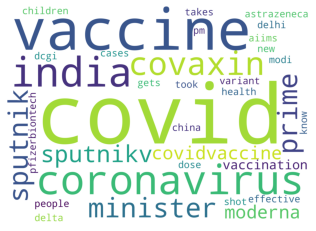

In [26]:
cloud1 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((first_topic_words)))
plt.imshow(cloud1)
plt.axis('off')
plt.show()
cloud1.to_file('topic1.png')

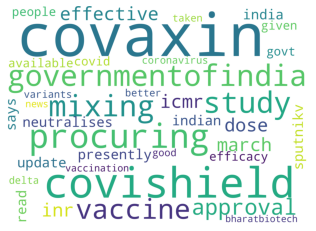

In [27]:
cloud2 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((second_topic_words)))
plt.imshow(cloud2)
plt.axis('off')
plt.show()

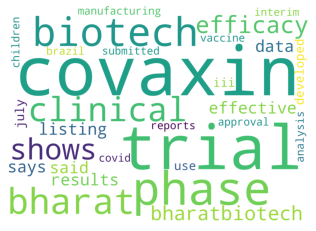

In [28]:
cloud3 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((third_topic_words)))
plt.imshow(cloud3)
plt.axis('off')
plt.show()

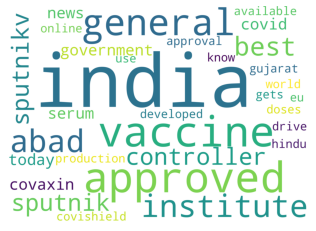

In [29]:
cloud4 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((fourth_topic_words)))
plt.imshow(cloud4)
plt.axis('off')
plt.show()

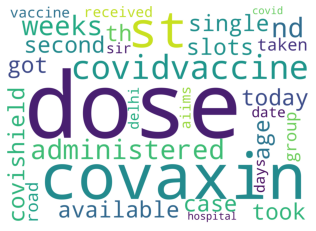

In [30]:
cloud5 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((fifth_topic_words)))
plt.imshow(cloud5)
plt.axis('off')
plt.show()

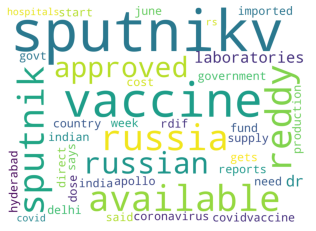

In [31]:
cloud6 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((sixth_topic_words)))
plt.imshow(cloud6)
plt.axis('off')
plt.show()

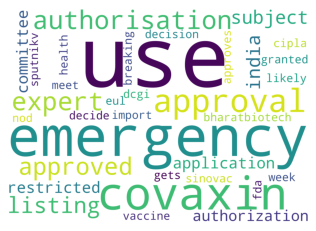

In [32]:
cloud7 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((seventh_topic_words)))
plt.imshow(cloud7)
plt.axis('off')
plt.show()

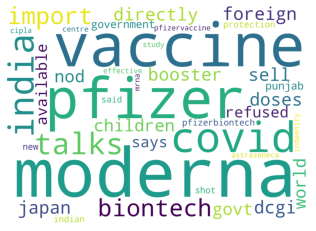

In [33]:
cloud8 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((eight_topic_words)))
plt.imshow(cloud8)
plt.axis('off')
plt.show()

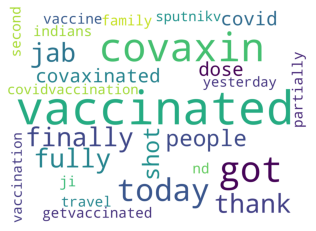

In [34]:
cloud9 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((ninth_topic_words)))
plt.imshow(cloud9)
plt.axis('off')
plt.show()

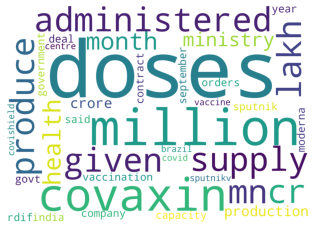

In [35]:
cloud10 = WordCloud(
                          
                          background_color='white',
                          width=2500,
                          height=1800
                     ).generate(" ".join((tenth_topic_words)))
plt.imshow(cloud10)
plt.axis('off')
plt.show()

In [36]:
from textblob import TextBlob 


In [37]:
topic1="'modi', 'delta', 'covid vaccines', 'cases', 'coronavirus covid', 'new', 'people', 'variant', 'prime minister', 'astrazeneca', 'dcgi', 'covid coronavirus', 'sputnik covid', 'vaccine sputnikv', 'know', 'gets', 'effective', 'china', 'covid covidvaccine', 'health', 'moderna', 'shot', 'vaccine india', 'prime', 'covidvaccine', 'pm', 'took', 'sputnik', 'takes', 'covid covaxin', 'aiims', 'minister', 'pfizerbiontech', 'children', 'sputnikv covid', 'delhi', 'covid india', 'india covid', 'moderna covid', 'coronavirus', 'vaccine covid', 'dose covid', 'covaxin covid', 'covid covid', 'covid vaccination', 'vaccination', 'vaccine covaxin', 'covid vaccine', 'vaccine', 'covid'"
topic2="'march', 'procuring', 'presently governmentofindia', 'inr dose', 'procuring inr', 'governmentofindia', 'governmentofindia procuring', 'covaxin march', 'icmr study', 'india covaxin', 'like', 'read', 'says', 'indian', 'covaxin sputnikv', 'mixing covaxin', 'study mixing', 'neutralises', 'update', 'efficacy', 'people', 'dose covishield', 'available', 'govt', 'covaxin covid', 'given', 'vaccine covishield', 'coronavirus', 'vaccine covaxin', 'approval covaxin', 'variants', 'covaxin approval', 'taken', 'delta', 'better', 'good', 'vaccination', 'news', 'covaxin effective', 'mixing', 'bharatbiotech', 'effective', 'icmr', 'vaccines', 'approval', 'study', 'covaxin covishield', 'covishield covaxin', 'covishield', 'covaxin'"
topic3="'july', 'iii', 'trials covaxin', 'phase results', 'covaxin effective', 'developed', 'use listing', 'manufacturing', 'analysis', 'effective', 'biotech covid', 'biotech said', 'approval', 'says bharat', 'listing', 'submitted', 'reports', 'phase clinical', 'children', 'clinical trial', 'covaxin bharat', 'shows efficacy', 'covaxin phase', 'clinical trials', 'vaccine covaxin', 'trial data', 'said', 'says', 'covaxin shows', 'shows', 'phase trials', 'efficacy phase', 'covaxin bharatbiotech', 'brazil', 'bharatbiotech covaxin', 'results', 'interim', 'phase trial', 'clinical', 'trial', 'bharatbiotech', 'trials', 'efficacy', 'data', 'phase', 'biotech covaxin', 'covaxin', 'bharat biotech', 'biotech', 'bharat'"
topic4="'doses india', 'online', 'india best', 'general', 'know', 'eu', 'general india', 'controller general', 'sputnikv approved', 'vaccine approved', 'institute india', 'sputnik india', 'developed', 'world', 'sputnik', 'gujarat india', 'government', 'today', 'approval india', 'controller', 'best', 'approved india', 'serum', 'india abad', 'abad', 'abad india', 'serum institute', 'india covishield', 'institute', 'hindu', 'government india', 'india news', 'production', 'vaccines india', 'gets', 'available india', 'drive', 'india today', 'use india', 'news', 'approved', 'sputnikv india', 'india covid', 'vaccine india', 'india vaccine', 'covaxin india', 'covid india', 'india covaxin', 'india india', 'india'"
topic5="'taken', 'age group', 'dose available', 'covaxin st', 'road', 'dose case', 'case covishield', 'single dose', 'received', 'single', 'dose covishield', 'date', 'covidvaccine administered', 'covaxin today', 'age', 'covaxin th', 'aiims', 'administered weeks', 'covaxin dose', 'took dose', 'got dose', 'dose vaccine', 'sir', 'weeks st', 'dose dose', 'dose covidvaccine', 'delhi', 'covidvaccine', 'days', 'took', 'available', 'hospital', 'administered', 'dose slots', 'dose covid', 'got', 'th', 'slots', 'weeks', 'covaxin nd', 'today', 'covaxin', 'st dose', 'st', 'second dose', 'second', 'nd dose', 'nd', 'dose covaxin', 'dose'"
topic6="'government', 'gets', 'fund', 'country', 'says', 'direct', 'russian vaccine', 'sputnikv india', 'said', 'week', 'supply', 'reports', 'sputnikv available', 'sputnikv approved', 'dose sputnikv', 'cost', 'delhi', 'covidvaccine', 'imported', 'need', 'june', 'govt', 'start', 'apollo', 'coronavirus', 'rdif', 'russia sputnik', 'production', 'hyderabad', 'reddy laboratories', 'laboratories', 'vaccine available', 'indian', 'hospitals', 'sputnikv covid', 'rs', 'vaccine sputnikv', 'approved', 'sputnik vaccine', 'available', 'russia sputnikv', 'russian', 'dr reddy', 'reddy', 'dr', 'sputnik', 'vaccine', 'sputnikv vaccine', 'russia', 'sputnikv'"
topic7="'eul', 'use covaxin', 'health', 'decide', 'bharatbiotech', 'authorisation covaxin', 'subject', 'import', 'approval india', 'subject expert', 'approval covaxin', 'application', 'application emergency', 'expert committee', 'cipla', 'approval emergency', 'meet', 'committee', 'restricted emergency', 'likely', 'restricted', 'sinovac', 'vaccine emergency', 'week', 'authorization', 'nod', 'use authorization', 'expert', 'approves', 'sputnikv approved', 'breaking', 'fda', 'decision', 'granted', 'covaxin emergency', 'dcgi', 'gets', 'listing covaxin', 'approved emergency', 'use approval', 'approved', 'use india', 'approval', 'use authorisation', 'authorisation', 'use listing', 'listing', 'emergency use', 'emergency', 'use'"
topic8="'doses moderna', 'directly', 'dcgi', 'like', 'india moderna', 'foreign', 'japan', 'booster', 'sell', 'vaccines pfizer', 'children', 'nod', 'world', 'govt', 'talks pfizer', 'refused', 'vaccines available', 'says', 'covid', 'government', 'import moderna', 'punjab', 'pfizerbiontech', 'said', 'indian', 'new', 'protection', 'shot', 'pfizervaccine', 'effective', 'vaccines india', 'study', 'mrna', 'talks', 'astrazeneca', 'import', 'centre', 'indemnity', 'pfizer biontech', 'biontech', 'cipla', 'moderna vaccine', 'moderna vaccines', 'moderna pfizer', 'moderna covid', 'covid vaccines', 'pfizer moderna', 'vaccines', 'pfizer', 'moderna'"
topic9="'vaccinated people', 'jab today', 'vaccinated dose', 'got second', 'vaccine today', 'jab covaxin', 'partially', 'shot covaxin', 'travel', 'covid covaxin', 'family', 'ji', 'vaccinated thank', 'vaccinated nd', 'vaccinated covid', 'covaxin covaxinated', 'got shot', 'finally fully', 'thank covaxin', 'getvaccinated', 'got dose', 'shot', 'people vaccinated', 'indians', 'covaxinated', 'today covaxin', 'got fully', 'finally vaccinated', 'covidvaccination', 'yesterday', 'vaccination', 'vaccinated sputnikv', 'finally got', 'got jab', 'vaccinated today', 'covaxin today', 'thanks', 'jab', 'thank', 'covaxin vaccinated', 'people', 'finally', 'today', 'covaxin', 'got vaccinated', 'fully vaccinated', 'fully', 'got', 'vaccinated covaxin', 'vaccinated'"
topic10="'doses administered', 'doses given', 'rdif', 'government', 'doses sputnik', 'vaccination', 'doses india', 'given', 'million covaxin', 'contract', 'capacity', 'cr doses', 'company', 'orders', 'produce million', 'said', 'supply million', 'lakh doses', 'mn doses', 'september', 'doses month', 'deal', 'year', 'govt', 'doses moderna', 'doses sputnikv', 'health', 'ministry', 'health ministry', 'lakh', 'produce', 'cr', 'month', 'doses covid', 'centre', 'administered', 'covaxin production', 'doses covishield', 'mn', 'crore doses', 'vaccine doses', 'brazil', 'supply', 'covaxin doses', 'crore', 'production', 'doses covaxin', 'million doses', 'million', 'doses'"
blob1 = TextBlob(topic1)
blob2 = TextBlob(topic2)
blob3 = TextBlob(topic3)
blob4 = TextBlob(topic4)
blob5 = TextBlob(topic5)
blob6 = TextBlob(topic6)
blob7 = TextBlob(topic7)
blob8 = TextBlob(topic8)
blob9 = TextBlob(topic9)
blob10 = TextBlob(topic10)
print(blob1.sentiment)
print(blob2.sentiment)
print(blob3.sentiment)
print(blob4.sentiment)
print(blob5.sentiment)
print(blob6.sentiment)
print(blob7.sentiment)
print(blob8.sentiment)
print(blob9.sentiment)
print(blob10.sentiment)

Sentiment(polarity=0.36818181818181817, subjectivity=0.6272727272727273)
Sentiment(polarity=0.46666666666666673, subjectivity=0.5166666666666666)
Sentiment(polarity=0.4333333333333333, subjectivity=0.6333333333333334)
Sentiment(polarity=0.37857142857142856, subjectivity=0.39999999999999997)
Sentiment(polarity=0.10952380952380954, subjectivity=0.20476190476190478)
Sentiment(polarity=0.21666666666666667, subjectivity=0.26666666666666666)
Sentiment(polarity=-0.1111111111111111, subjectivity=0.5555555555555555)
Sentiment(polarity=0.22227272727272726, subjectivity=0.4359090909090909)
Sentiment(polarity=0.014285714285714287, subjectivity=0.6428571428571429)
Sentiment(polarity=0.0, subjectivity=0.0)
